In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [10]:
# cargar el archivo .mat
data = sio.loadmat('Tiosulfatosodio.mat')

#Extrayendo matriz de caracteristicas 
Xi = data['x']

#Extrayendo dato esperado (Clases)
Yi = data['y']

#Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
bias = np.full((Xi.shape[0], 1), 1)
Xi = np.hstack((bias, Xi))

#numero de datos
num_datos = Xi.shape[0]

#numero de caracteristicas
caract = Xi.shape[1]-1                  # Se resta el bias 




#Definicion de errores
Err_entr = 10;
Err_pru = 10;

#Datos de entrenamiento y prueba: entrenamiento 90% , prueba 10%
X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)

#Obteniendo datos de validacion: Validacion 10% y Entrenamiento 80%
#Se extraen los datos de validación a partir de los de entrenamiento
X_ent, X_val, Y_ent, Y_val = train_test_split(X_ent, Y_ent, test_size=0.1, random_state=42)

#Obteniendo datos de entrenamiento y prueba
D_entre  =  len(X_ent)       # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
D_prueba =  len(X_pru)       #Datos de validacion 
D_val    =  len(X_val)

print(D_entre)

324


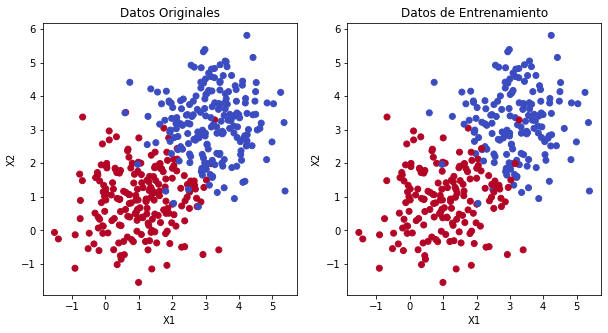

In [11]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la segunda gráfica en el segundo subplot
ax1.scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
ax1.set_title('Datos Originales')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

# Graficar la primera gráfica en el primer subplot
ax2.scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
ax2.set_title('Datos de Entrenamiento')
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")


# Mostrar la figura
plt.show()


In [12]:
#Definicion de los pesos e inicialización 
Wk = []  
for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
    Wk.append(0)                # vector de pesos extendido
print(Wk)


[0, 0, 0]


In [13]:
def Calculo_error(x,y,w,n):
    """
    X: Features vector 
    Y: Label output 
    w: Weight vector 
    n: Data length 
    """
    
    suma = 0                               # Cont. that storage the errors 
    
    for i in range (n):
        g = np.dot(np.transpose(w), x[i])  # Internal State of Neuron 

        if g < 0:                          # Umbral for classification in the LMS Algorithm
            g = -1
        else:
            g = 1

        if g != y[i]:                      # CError condition
            suma = suma + 1                # Cont. Error

    error_pct = 100.0 * suma / n           # Porcentual error
    
    return error_pct

In [14]:
error_ent = []
suma=0
iteraciones = 0

Emin = 15
Eent =  0


print("Wo: ", Wk )

V_errorEnt = []
V_errorPru = []

V=0
Vmax=0
W_bolsillo=[i for i in range(X_ent.shape[1])]

while(iteraciones < 2000):
	i = np.random.randint(0,D_entre)
	if (np.dot(np.transpose(Wk),X_ent[i])*Y_ent[i])>0:
		V=V+1
		if V>Vmax: 
			Vmax=V
			W_bolsillo = Wk

	else:
		Wk = Wk + X_ent[i]*Y_ent[i] #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz
		V=0
   
	
	
	Eent = Calculo_error(X_ent,Y_ent,Wk,D_entre)
	print("Error De entrenamiento", Eent)
	V_errorEnt.append(Eent)        
    
	Epru = Calculo_error(X_pru,Y_pru,W_bolsillo,D_prueba)
	print("Error de prueba",Epru) 
	V_errorPru.append(Epru)
	
	if Eent <= Emin and Epru <= Emin :
		break
        
	iteraciones = iteraciones + 1;

   

Wo:  [0, 0, 0]
Error De entrenamiento 49.69135802469136
Error de prueba 50.0
Error De entrenamiento 45.06172839506173
Error de prueba 50.0
Error De entrenamiento 45.06172839506173
Error de prueba 50.0
Error De entrenamiento 45.06172839506173
Error de prueba 50.0
Error De entrenamiento 25.0
Error de prueba 50.0
Error De entrenamiento 25.0
Error de prueba 50.0
Error De entrenamiento 25.0
Error de prueba 50.0
Error De entrenamiento 25.0
Error de prueba 32.5
Error De entrenamiento 49.074074074074076
Error de prueba 32.5
Error De entrenamiento 49.074074074074076
Error de prueba 32.5
Error De entrenamiento 44.135802469135804
Error de prueba 32.5
Error De entrenamiento 35.18518518518518
Error de prueba 32.5
Error De entrenamiento 35.18518518518518
Error de prueba 32.5
Error De entrenamiento 48.76543209876543
Error de prueba 32.5
Error De entrenamiento 41.04938271604938
Error de prueba 32.5
Error De entrenamiento 41.04938271604938
Error de prueba 32.5
Error De entrenamiento 28.395061728395063


In [15]:
print("Error De entrenamiento", Eent)
Epru = Calculo_error(X_pru,Y_pru,W_bolsillo,D_prueba)
print("Error de prueba",Epru)
Eval = Calculo_error(X_val,Y_val,W_bolsillo,D_val)
print("Error de Validacion",Eval) 


Error De entrenamiento 5.246913580246914
Error de prueba 10.0
Error de Validacion 8.333333333333334


##################  Probando datos de Validacion  ###########
error_val = Calculo_error(X_val,Y_val,Wk,D_val)
print("Error de entrenamiento: ", np.round(Eent,4))
print("Error de Prueba: ",  np.round(Epru,4) )
print("Error total de validacion: ", np.round(error_val,4))

plt.figure(figsize=(14,8))
plt.plot(error_ent, 'b+', label = "Error de entrenamiento pequeño")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid()

plt.figure(figsize=(14,8))
plt.plot(V_errorEnt , 'g' ,label = f"Error Entrenamiento final {round(Eent,4)} %")
plt.plot(V_errorPru, 'r' , label = f"Error Prueba final {round(Epru,4)} %")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Error (%)')
plt.grid()

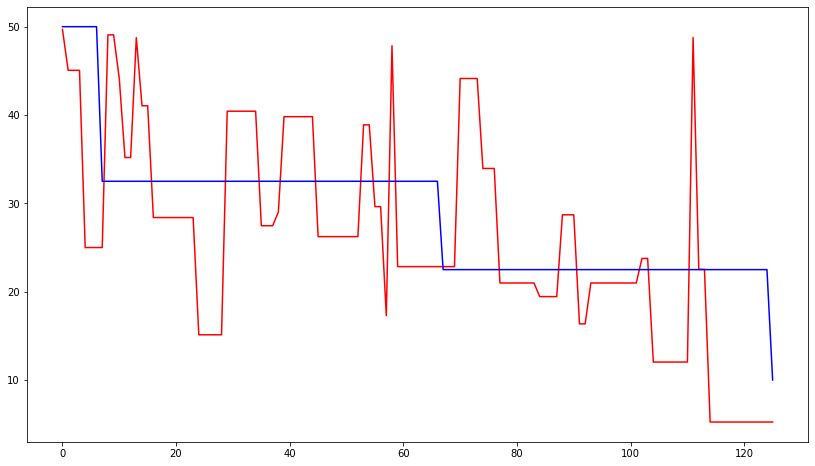

In [16]:
plt.figure(figsize=(14,8))
plt.plot(V_errorEnt,"r")
plt.plot(V_errorPru,"b")

